A cohort is a group of subjects who share a defining characteristic. We can observe how a cohort behaves across time and compare it to other cohorts. Cohorts are used in medicine, psychology, econometrics, ecology and many other areas to perform a cross-section (compare difference across subjects) at intervals through time.

Types of cohorts:

Time Cohorts are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the time they started using the company’s products or services. The time may be monthly or quarterly even daily.

Behaovior cohorts are customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understaning the needs of the various cohorts can help a company design custom-made services or products for particular segments.

Size cohorts refer to the various sizes of customers who purchase company’s products or services. This categorization can be based on the amount of spending in some periodic time after acquisition or the product type that the customer spent most of their order amount in some period of time.


https://towardsdatascience.com/cohort-analysis-with-python-2bdf05e36f57

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('sales_2018-01-01_2019-12-31.csv')
df


,day,customer_id,customer_type,total_sales
0,2018-01-01,65798701081,Returning,30.80
1,2018-01-01,263760969753,First-time,82.80
2,2018-01-01,4507624326,Returning,26.00
3,2018-01-01,5982990732,Returning,128.16
4,2018-01-01,31019499545,Returning,66.00
...,...,...,...,...
90295,2019-12-31,6348897036,Returning,-2.50
90296,2019-12-31,1216271089748,Returning,25.00
90297,2019-12-31,3068475408468,First-time,213.09
90298,2019-12-31,2949441028180,Returning,32.80


In [80]:
df.info

<bound method DataFrame.info of               day    customer_id customer_type  total_sales
0      2018-01-01    65798701081     Returning        30.80
1      2018-01-01   263760969753    First-time        82.80
2      2018-01-01     4507624326     Returning        26.00
3      2018-01-01     5982990732     Returning       128.16
4      2018-01-01    31019499545     Returning        66.00
...           ...            ...           ...          ...
90295  2019-12-31     6348897036     Returning        -2.50
90296  2019-12-31  1216271089748     Returning        25.00
90297  2019-12-31  3068475408468    First-time       213.09
90298  2019-12-31  2949441028180     Returning        32.80
90299  2019-12-31  1713509630036     Returning       152.50

[90300 rows x 4 columns]>

In [81]:
df.customer_id.value_counts()

312844058649     84
47675047961      81
386800353305     77
6222405388       66
6110720396       64
                 ..
635565604948      1
2551766679636     1
1836598296660     1
312957239321      1
2482814189652     1
Name: customer_id, Length: 22407, dtype: int64

In [82]:
#Separate first time customers from returning customers
first_time = df.loc[df['customer_type'] == 'First-time',]
final = df.loc[df['customer_id'].isin(first_time['customer_id'].values)]

In [83]:
final = final.drop(columns = ['customer_type'])
final['day']= pd.to_datetime(final['day'], dayfirst=True)

In [84]:
# Sort the data by customer ID, followed by date
final = final.sort_values(['customer_id','day'])
final.reset_index(inplace = True, drop = True)

In [85]:
final.head(10)

,day,customer_id,total_sales
0,2019-10-19,3100202950,34.90
1,2018-02-25,3220302214,96.40
2,2018-10-31,3220302214,88.25
3,2018-05-20,3222133318,159.90
4,2019-02-25,3314438534,27.55
5,2019-03-15,3314438534,69.60
6,2019-04-08,3314438534,42.50
7,2019-05-09,3314438534,87.00
8,2019-06-24,3314438534,73.00
9,2019-08-10,3314438534,29.70


In [86]:
len(final['customer_id'])

64411

In [87]:
#Define some functions

def purchase_rate(customer_id):
    
    purchase_rate = [1]
    counter = 1
    for i in range(1,len(customer_id)):
          if customer_id[i] != customer_id[i-1]:
                 purchase_rate.append(1)
                 counter = 1
          else:
                 counter += 1
                 purchase_rate.append(counter)
    return purchase_rate

def join_date(date, purchase_rate):
    join_date = list(range(len(date)))
    for i in range(len(purchase_rate)): 
          if purchase_rate[i] == 1:
                 join_date[i] = date[i]
          else:
                 join_date[i] = join_date[i-1]
    return join_date

def age_by_month(purchase_rate, month, year, join_month, join_year):                
                 
    age_by_month = list(range(len(year)))
    for i in range(len(purchase_rate)):
        if purchase_rate[i] == 1:
            age_by_month[i] = 0           
        else:
            if year[i] == join_year[i]:
                age_by_month[i] = month[i] - join_month[i]
            else:
                age_by_month[i] = month[i] - join_month[i] + 12*(year[i]-join_year[i])
    return age_by_month


purchase_rate function will determine whether that is a 2nd, 3rd, 4th purchase of each customer.

join_date function allows us to identify the date the customer joins.

age_by_month function gives us how many months from the current purchase of a customer to the first time purchase.

Now the input is ready. Let’s create cohorts.

In [88]:
## Create cohorts

final['month'] =pd.to_datetime(final['day']).dt.month
final['Purchase Rate'] = purchase_rate(final['customer_id'])
final['Join Date'] = join_date(final['day'], final['Purchase Rate'])
final['Join Date'] = pd.to_datetime(final['Join Date'], dayfirst=True)
final['cohort'] = pd.to_datetime(final['Join Date']).dt.strftime('%Y-%m')
final['year'] = pd.to_datetime(final['day']).dt.year
final['Join Date Month'] = pd.to_datetime(final['Join Date']).dt.month
final['Join Date Year'] = pd.to_datetime(final['Join Date']).dt.year

In [89]:
final.head()

,day,customer_id,total_sales,month,Purchase Rate,Join Date,cohort,year,Join Date Month,Join Date Year
0,2019-10-19,3100202950,34.90,10,1,2019-10-19,2019-10,2019,10,2019
1,2018-02-25,3220302214,96.40,2,1,2018-02-25,2018-02,2018,2,2018
2,2018-10-31,3220302214,88.25,10,2,2018-02-25,2018-02,2018,2,2018
3,2018-05-20,3222133318,159.90,5,1,2018-05-20,2018-05,2018,5,2018
4,2019-02-25,3314438534,27.55,2,1,2019-02-25,2019-02,2019,2,2019


In [90]:
final['Age by month'] = age_by_month(final['Purchase Rate'], final['month'],final['year'],final['Join Date Month'],final['Join Date Year'])

In [91]:
final.head()

,day,customer_id,total_sales,month,Purchase Rate,Join Date,cohort,year,Join Date Month,Join Date Year,Age by month
0,2019-10-19,3100202950,34.90,10,1,2019-10-19,2019-10,2019,10,2019,0
1,2018-02-25,3220302214,96.40,2,1,2018-02-25,2018-02,2018,2,2018,0
2,2018-10-31,3220302214,88.25,10,2,2018-02-25,2018-02,2018,2,2018,8
3,2018-05-20,3222133318,159.90,5,1,2018-05-20,2018-05,2018,5,2018,0
4,2019-02-25,3314438534,27.55,2,1,2019-02-25,2019-02,2019,2,2019,0


In [92]:
import numpy as np
cohorts = final.groupby(['cohort','Age by month']).nunique()
cohorts = cohorts.customer_id.to_frame().reset_index()   # convert series to frame
cohorts = pd.pivot_table(cohorts, values = 'customer_id',index = 'cohort', columns= 'Age by month')
cohorts.replace(np.nan, '',regex=True)

Age by month,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cohort,,,,,,,,,,,,,,,,,,,,,
2018-01,462.0,121,125,113,111,107,101,103,87,86,...,94,88,98,72,87,69,61,77,74,80
2018-02,483.0,134,132,117,113,115,94,106,96,115,...,98,84,81,86,70,74,65,82,83,
2018-03,508.0,143,149,121,123,109,117,114,125,111,...,94,80,87,78,83,72,94,83,,
2018-04,540.0,130,127,133,117,116,113,145,119,124,...,98,108,96,94,95,113,100,,,
2018-05,548.0,152,150,136,123,143,126,114,116,108,...,118,94,91,102,110,113,,,,
2018-06,548.0,149,163,154,115,164,108,112,110,118,...,102,86,81,108,93,,,,,
2018-07,553.0,140,136,138,153,128,128,108,132,114,...,109,103,117,111,,,,,,
2018-08,638.0,165,176,176,161,124,129,151,126,132,...,106,109,124,,,,,,,
2018-09,623.0,139,148,129,126,116,120,101,118,103,...,103,98,,,,,,,,


## How to interpret this table
Take cohort 2018–01 as an example. In Jan 2018, there were 462 new customers. 

Out of these 462, 121 customers came back and purchased in Feb 2018, 125 in Mar 2018 and so on and so forth.

### Convert into cohort percentage

In [93]:
for i in range(len(cohorts)-1):
    cohorts[i+1] = cohorts[i+1]/cohorts[0]
cohorts[0] = cohorts[0]/cohorts[0]

In [94]:
cohorts

Age by month,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cohort,,,,,,,,,,,,,,,,,,,,,
2018-01,1.0,0.261905,0.270563,0.244589,0.240260,0.231602,0.218615,0.222944,0.188312,0.186147,...,0.203463,0.190476,0.212121,0.155844,0.188312,0.149351,0.132035,0.166667,0.160173,0.17316
2018-02,1.0,0.277433,0.273292,0.242236,0.233954,0.238095,0.194617,0.219462,0.198758,0.238095,...,0.202899,0.173913,0.167702,0.178054,0.144928,0.153209,0.134576,0.169772,0.171843,NaN
2018-03,1.0,0.281496,0.293307,0.238189,0.242126,0.214567,0.230315,0.224409,0.246063,0.218504,...,0.185039,0.157480,0.171260,0.153543,0.163386,0.141732,0.185039,0.163386,NaN,NaN
2018-04,1.0,0.240741,0.235185,0.246296,0.216667,0.214815,0.209259,0.268519,0.220370,0.229630,...,0.181481,0.200000,0.177778,0.174074,0.175926,0.209259,0.185185,NaN,NaN,NaN
2018-05,1.0,0.277372,0.273723,0.248175,0.224453,0.260949,0.229927,0.208029,0.211679,0.197080,...,0.215328,0.171533,0.166058,0.186131,0.200730,0.206204,NaN,NaN,NaN,NaN
2018-06,1.0,0.271898,0.297445,0.281022,0.209854,0.299270,0.197080,0.204380,0.200730,0.215328,...,0.186131,0.156934,0.147810,0.197080,0.169708,NaN,NaN,NaN,NaN,NaN
2018-07,1.0,0.253165,0.245931,0.249548,0.276673,0.231465,0.231465,0.195298,0.238698,0.206148,...,0.197107,0.186257,0.211573,0.200723,NaN,NaN,NaN,NaN,NaN,NaN
2018-08,1.0,0.258621,0.275862,0.275862,0.252351,0.194357,0.202194,0.236677,0.197492,0.206897,...,0.166144,0.170846,0.194357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09,1.0,0.223114,0.237560,0.207063,0.202247,0.186196,0.192616,0.162119,0.189406,0.165329,...,0.165329,0.157303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualisation

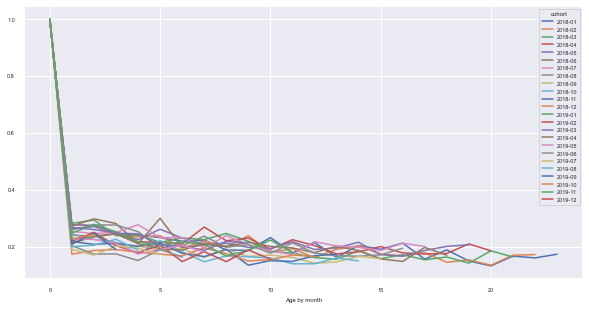

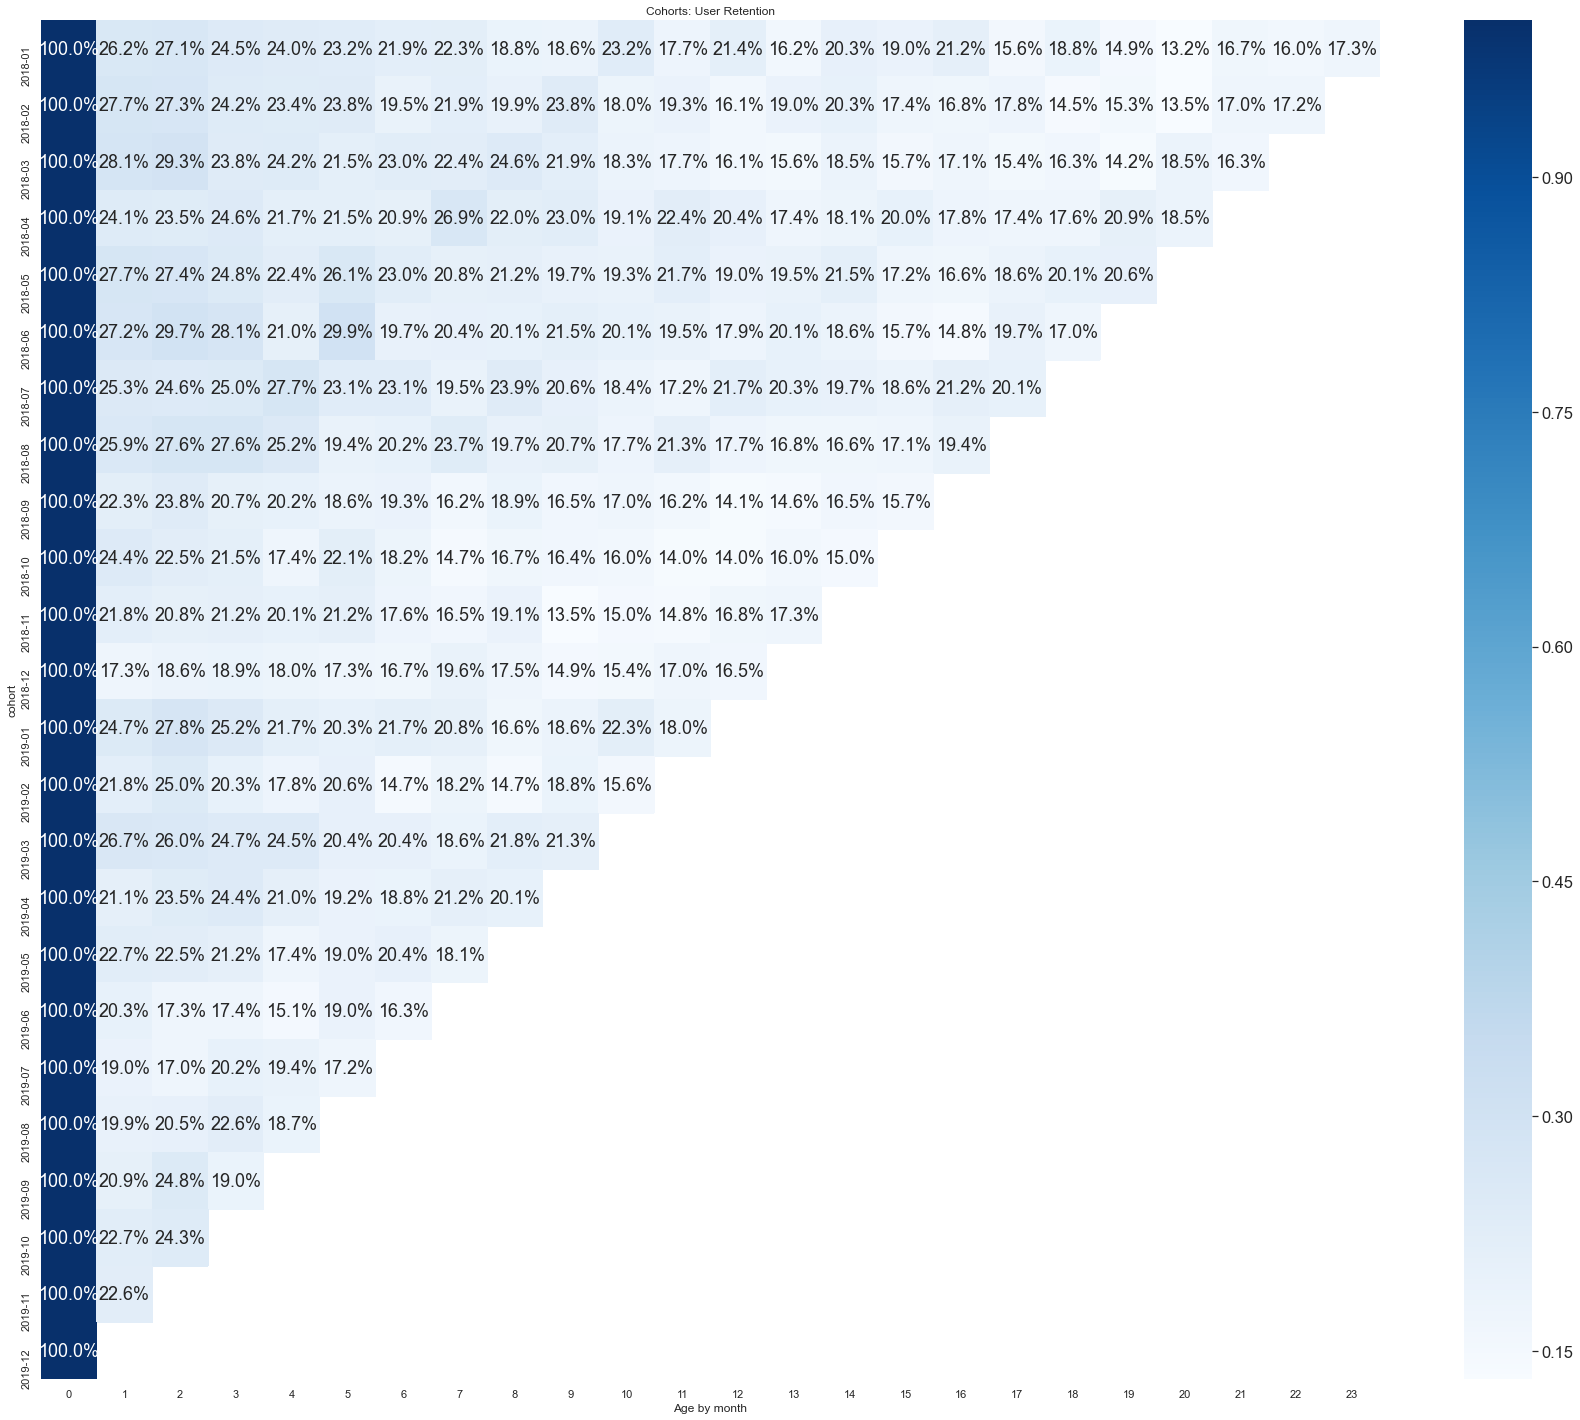

In [97]:
cohorts_t = cohorts.transpose()
cohorts_t[cohorts_t.columns].plot(figsize=(10,5))
sns.set(style='whitegrid')
plt.figure(figsize=(30, 25))
plt.title('Cohorts: User Retention')
sns.set(font_scale = 1.5) # font size
sns.heatmap(cohorts, mask=cohorts.isnull(),
cmap="Blues",
annot=True, fmt='.01%')
plt.show()